In [1]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [3]:
breastcancer = pd.read_csv('breastcancer.csv')
breastcancer.info()
breastcancer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   id                       569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,842302,17.990,10.380,122.800,"1,001.000",0.118,0.278,0.300,0.147,...,25.380,17.330,184.600,"2,019.000",0.162,0.666,0.712,0.265,0.460,0.119
1,M,842517,20.570,17.770,132.900,"1,326.000",0.085,0.079,0.087,0.070,...,24.990,23.410,158.800,"1,956.000",0.124,0.187,0.242,0.186,0.275,0.089
2,M,84300903,19.690,21.250,130.000,"1,203.000",0.110,0.160,0.197,0.128,...,23.570,25.530,152.500,"1,709.000",0.144,0.424,0.450,0.243,0.361,0.088
3,M,84348301,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,M,84358402,20.290,14.340,135.100,"1,297.000",0.100,0.133,0.198,0.104,...,22.540,16.670,152.200,"1,575.000",0.137,0.205,0.400,0.163,0.236,0.077


In [5]:
breastcancer.tail()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,926424,21.560,22.390,142.000,"1,479.000",0.111,0.116,0.244,0.139,...,25.450,26.400,166.100,"2,027.000",0.141,0.211,0.411,0.222,0.206,0.071
565,M,926682,20.130,28.250,131.200,"1,261.000",0.098,0.103,0.144,0.098,...,23.690,38.250,155.000,"1,731.000",0.117,0.192,0.322,0.163,0.257,0.066
566,M,926954,16.600,28.080,108.300,858.100,0.085,0.102,0.093,0.053,...,18.980,34.120,126.700,"1,124.000",0.114,0.309,0.340,0.142,0.222,0.078
567,M,927241,20.600,29.330,140.100,"1,265.000",0.118,0.277,0.351,0.152,...,25.740,39.420,184.600,"1,821.000",0.165,0.868,0.939,0.265,0.409,0.124
568,B,92751,7.760,24.540,47.920,181.000,0.053,0.044,0.000,0.000,...,9.456,30.370,59.160,268.600,0.090,0.064,0.000,0.000,0.287,0.070


In [9]:
breastcancer.drop("id",axis=1,inplace=True)

In [12]:
breastcancer['diagnosis']=breastcancer['diagnosis'].map({'M':1,'B':0})

In [13]:
breastcancer.describe() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,0.373,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,0.484,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,0.000,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,0.055
25%,0.000,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,...,13.010,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.071
50%,0.000,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,1.000,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,...,18.790,29.720,125.400,"1,084.000",0.146,0.339,0.383,0.161,0.318,0.092
max,1.000,28.110,39.280,188.500,"2,501.000",0.163,0.345,0.427,0.201,0.304,...,36.040,49.540,251.200,"4,254.000",0.223,1.058,1.252,0.291,0.664,0.207


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


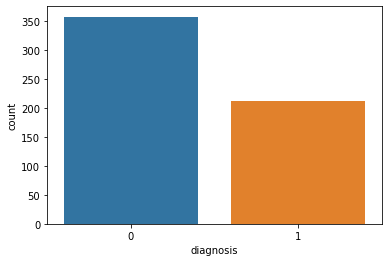

In [15]:
sns.countplot(breastcancer['diagnosis'],label="Count")
plt.show()

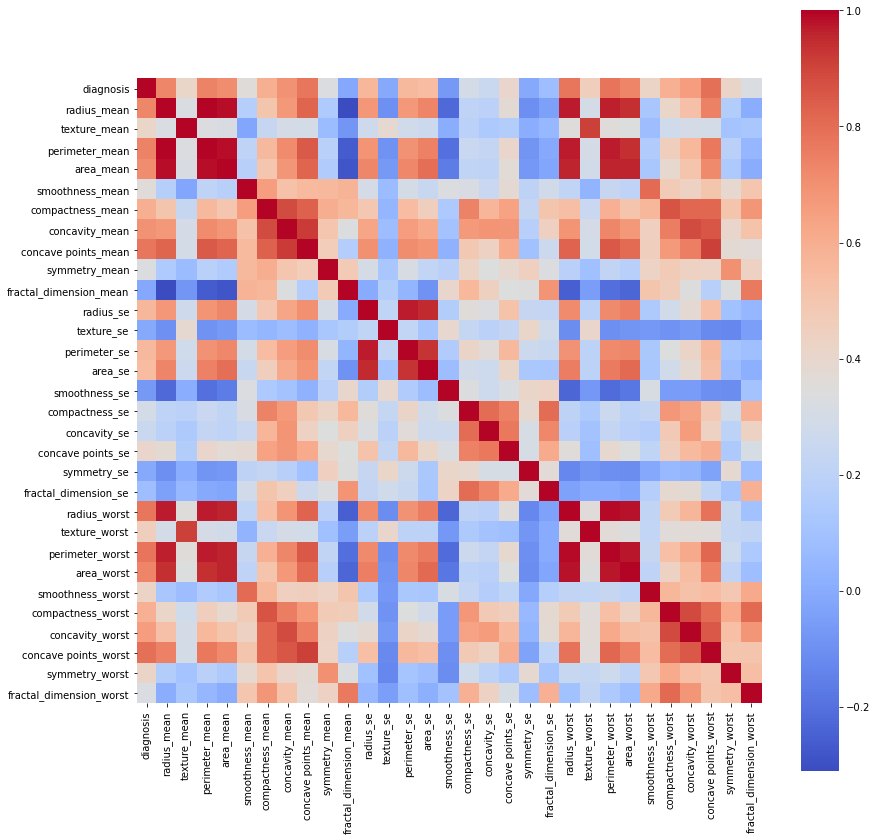

In [17]:
corr = breastcancer.corr() 
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

In [18]:
X = breastcancer[['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']]

y = breastcancer[['diagnosis']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 5)
(171, 5)
(398, 1)
(171, 1)


In [21]:
logr = LogisticRegression()

In [22]:
logr.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [23]:
y_pred = logr.predict(X_test)

In [24]:
metrics.accuracy_score(y_test, y_pred)

0.8713450292397661

In [25]:
metrics.confusion_matrix(y_test, y_pred)

array([[99,  9],
       [13, 50]], dtype=int64)

In [26]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [28]:
train, test = train_test_split(breastcancer, test_size = 0.3, random_state = 1)
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [29]:
train_X = train[prediction_var]
train_y=train.diagnosis
test_X= test[prediction_var] 
test_y =test.diagnosis  

In [30]:
logistic = LogisticRegression()
logistic.fit(train_X,train_y)
temp=logistic.predict(test_X)
metrics.accuracy_score(test_y,temp) 

0.8713450292397661

In [31]:
metrics.confusion_matrix(test_y,temp)

array([[99,  9],
       [13, 50]], dtype=int64)

In [32]:
dt = DecisionTreeClassifier(random_state=1)

bc = BaggingClassifier(base_estimator=dt,
                       n_estimators= 300,
                       random_state=1)

bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Test set accuracy of bc: 0.89


In [33]:
rf_reg = RandomForestRegressor(random_state= 1)

rf_reg.fit(X_train, y_train)

preds = rf_reg.predict(X_test)

rmse = np.sqrt(MSE(preds, y_test))

print("Test set RMSE: {:.2f}".format(rmse))

<ipython-input-33-d3954a5c6cd1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Test set RMSE: 0.27


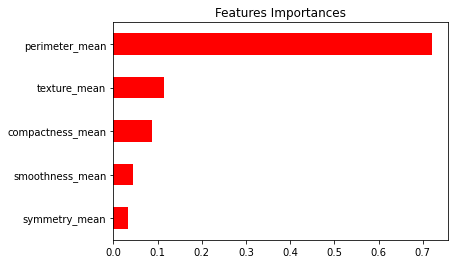

In [34]:
importances = pd.Series(data=rf_reg.feature_importances_,
                        index= X_train.columns)

importances_sorted = importances.sort_values()

importances_sorted.plot(color='red',
                        kind='barh')
plt.title('Features Importances')
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV

rf_reg = RandomForestRegressor(random_state= 1)
params_rf_reg = {
    'n_estimators': [100, 350, 500], 
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30]
}

from sklearn.model_selection import GridSearchCV

grid_rf_reg = GridSearchCV(estimator=rf_reg,
                       param_grid= params_rf_reg,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs=8)

In [47]:
grid_rf_reg.fit(X_train, y_train)

best_model = grid_rf_reg.best_estimator_

y_pred = best_model.predict(X_test)

rmse_test = np.sqrt(MSE(y_test, y_pred))

print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Test RMSE of best model: 0.265


In [49]:
import pandas as pd; import numpy as np
from sklearn.metrics import accuracy_score,  roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

In [50]:
scaler=StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [51]:
logreg = LogisticRegression(random_state=1)
dt = DecisionTreeClassifier(min_samples_leaf= 0.13, 
                            random_state=1)

classifiers = [('Logistic Regression', logreg), 
                             ('Classification Tree', dt)]


In [59]:
 from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers)     

vc.fit(X_train, y_train)   

y_pred = vc.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.877


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
